<a href="https://colab.research.google.com/github/AdrianoGalutti/DSA/blob/main/Modelagem_Churn_20210920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Definição Problema de Negócio

Em uma empresa de telecom há vários clientes que se utilizam de diversos serviços entre os principais internet e telefone.

O problema de negocio é que, analisando o histórico dos clientes dos últimos anos, percebeu que a empresa está com Churn de mais de 26% dos clientes. Isso representa uma perda de milhões para a empresa.

O conceito de Churn em poucas palavras e simplificando o entendimento é o numero de clientes que cancelaram o serviço prestado pela empresa, ou seja o Churn é um indicativo de gestão da empresa e controlá-lo se faz necessário para evitar problemas futuros.

Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.


## 2 - Aquisição dos dados

As informações foram extraidas do site Kaggle.

Link Original do Kaggle: https://www.kaggle.com/radmirzosimov/telecom-users-dataset

## 3 - Preparação dos dados

In [ ]:
import pandas as pd #análise de dados
import plotly.express as px #visualização de dados;
import numpy as np #pacote algebra linear;
import seaborn as sns #visualização de dados;
import matplotlib.pyplot as plt #visualização de dados;

dados_df = pd.read_csv(r'C:\Users\Adriano Galutti\OneDrive\Área de Trabalho\Criando um Portifolio\telecom_users.csv', sep = ',')
display(dados_df)

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,...,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95,Sim,NaN
5982,5191,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,...,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.3,Nao,NaN
5983,5226,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,...,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao,NaN
5984,5390,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,...,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim,NaN


In [ ]:
display(dados_df.columns)
dados_df.info()

Index(['Unnamed: 0', 'IDCliente', 'Genero', 'Aposentado', 'Casado',
       'Dependentes', 'MesesComoCliente', 'ServicoTelefone', 'MultiplasLinhas',
       'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline',
       'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV',
       'ServicoFilmes', 'TipoContrato', 'FaturaDigital', 'FormaPagamento',
       'ValorMensal', 'TotalGasto', 'Churn', 'Codigo'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5986 non-null   int64  
 1   IDCliente               5986 non-null   object 
 2   Genero                  5986 non-null   object 
 3   Aposentado              5986 non-null   int64  
 4   Casado                  5986 non-null   object 
 5   Dependentes             5985 non-null   object 
 6   MesesComoCliente        5986 non-null   int64  
 7   ServicoTelefone         5986 non-null   object 
 8   MultiplasLinhas         5986 non-null   object 
 9   ServicoInternet         5986 non-null   object 
 10  ServicoSegurancaOnline  5986 non-null   object 
 11  ServicoBackupOnline     5986 non-null   object 
 12  ProtecaoEquipamento     5986 non-null   object 
 13  ServicoSuporteTecnico   5986 non-null   object 
 14  ServicoStreamingTV      5986 non-null   

In [ ]:
dados_df['Aposentado'] = dados_df['Aposentado'].replace([0,1],['Nao','Sim'])
dados_df1 = dados_df.drop(['Unnamed: 0','IDCliente'] , axis=1) #excluindo coluna
dados_df1['TotalGasto'] = pd.to_numeric(dados_df['TotalGasto'], errors='coerce') #corrigindo o tipo de informação
dados_df1 = dados_df1.dropna(how='all', axis=1) #excluindo as colunas com valor vazio
dados_df1 = dados_df1.dropna(how='any', axis=0) #excluindo as linhas com valor vazio
dados_df1.info()
display(dados_df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genero                  5974 non-null   object 
 1   Aposentado              5974 non-null   object 
 2   Casado                  5974 non-null   object 
 3   Dependentes             5974 non-null   object 
 4   MesesComoCliente        5974 non-null   int64  
 5   ServicoTelefone         5974 non-null   object 
 6   MultiplasLinhas         5974 non-null   object 
 7   ServicoInternet         5974 non-null   object 
 8   ServicoSegurancaOnline  5974 non-null   object 
 9   ServicoBackupOnline     5974 non-null   object 
 10  ProtecaoEquipamento     5974 non-null   object 
 11  ServicoSuporteTecnico   5974 non-null   object 
 12  ServicoStreamingTV      5974 non-null   object 
 13  ServicoFilmes           5974 non-null   object 
 14  TipoContrato            5974 non-null   

,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn
0,Masculino,Nao,Sim,Sim,72,Sim,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao
1,Feminino,Nao,Nao,Nao,44,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.20,Nao
2,Feminino,Sim,Sim,Nao,38,Sim,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim
3,Masculino,Nao,Nao,Nao,4,Sim,Nao,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.50,Nao
4,Masculino,Nao,Nao,Nao,2,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.50,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Masculino,Nao,Sim,Nao,1,Sim,Nao,Fibra,Sim,Nao,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95.00,Sim
5982,Feminino,Nao,Sim,Sim,23,Sim,Sim,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.30,Nao
5983,Masculino,Nao,Sim,Sim,12,Sim,Nao,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao
5984,Masculino,Sim,Nao,Nao,12,Sim,Sim,Fibra,Nao,Nao,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim


## 4 - Análise Exploratória dos Dados

In [ ]:
dados_df1.describe()

,MesesComoCliente,ValorMensal,TotalGasto
count,5974.000000,5974.000000,5974.000000
mean,32.510880,64.849933,2297.565777
std,24.495864,30.107238,2274.021491
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,404.237500
50%,29.000000,70.425000,1411.775000
75%,56.000000,89.900000,3846.650000
max,72.000000,118.750000,8684.800000


### Visualização de Dados

Olhando como estão distribuidos os Churn/Cancelamento

In [ ]:
display(dados_df1['Churn'].value_counts())
display(dados_df1['Churn'].value_counts(normalize=True).map('{:.2%}'.format)) #monstrando a porcentagem de Churn

Nao    4387
Sim    1587
Name: Churn, dtype: int64

Nao    73.43%
Sim    26.57%
Name: Churn, dtype: object

Análise visual dos dados

In [ ]:
# substituindo a informação de clientes que sairam 'Churn' de string para numérico
dados_df1['Churn']=dados_df1['Churn'].replace(['Sim','Nao'],[1,0])
display(dados_df1)

,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn
0,Masculino,Nao,Sim,Sim,72,Sim,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,0
1,Feminino,Nao,Nao,Nao,44,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.20,0
2,Feminino,Sim,Sim,Nao,38,Sim,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,1
3,Masculino,Nao,Nao,Nao,4,Sim,Nao,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.50,0
4,Masculino,Nao,Nao,Nao,2,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Masculino,Nao,Sim,Nao,1,Sim,Nao,Fibra,Sim,Nao,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95.00,1
5982,Feminino,Nao,Sim,Sim,23,Sim,Sim,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.30,0
5983,Masculino,Nao,Sim,Sim,12,Sim,Nao,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,0
5984,Masculino,Sim,Nao,Nao,12,Sim,Sim,Fibra,Nao,Nao,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,1


* ### Variavel Genero

In [ ]:
df_plot = dados_df1.groupby ('Genero'). Churn.mean (). reset_index () 
df_plot

,Genero,Churn
0,Feminino,0.269874
1,Masculino,0.261584


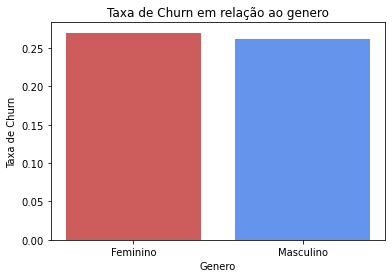

In [ ]:
#Genero em relação a variável churn
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

x =df_plot['Genero']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao genero');
plt.xlabel('Genero');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa de evasão de clientes em diferentes sexo são iguais.

* ### Variável Aposentado

In [ ]:
df_plot = dados_df1.groupby ('Aposentado'). Churn.mean (). reset_index () 
df_plot

,Aposentado,Churn
0,Nao,0.236621
1,Sim,0.416149


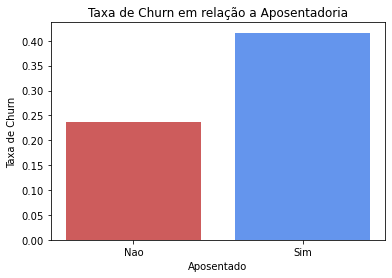

In [ ]:
x =df_plot['Aposentado']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Aposentadoria');
plt.xlabel('Aposentado');
plt.ylabel('Taxa de Churn');

Podemos observar que a evasão de clientes é maior em pessoas aposentadas.

* ### Variável Casado

In [ ]:
df_plot = dados_df1.groupby ('Casado'). Churn.mean (). reset_index () 
df_plot

,Casado,Churn
0,Nao,0.328247
1,Sim,0.199032


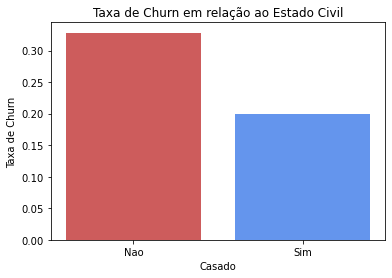

In [ ]:
x =df_plot['Casado']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Estado Civil');
plt.xlabel('Casado');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa de evasão de clientes solteiro é maior. 

* ### Variável Dependentes

In [ ]:
df_plot = dados_df1.groupby ('Dependentes'). Churn.mean (). reset_index () 
df_plot

,Dependentes,Churn
0,Nao,0.311397
1,Sim,0.157865


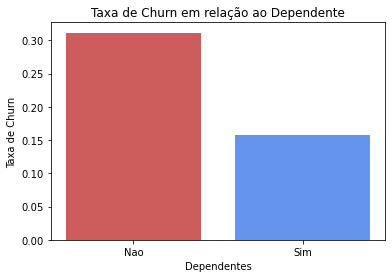

In [ ]:
x =df_plot['Dependentes']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Dependente');
plt.xlabel('Dependentes');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa evasão de clientes que não tem dependentes é duas vezes maior em relação aos clientes que tem dependentes.

* ### Serviço Telefonico

In [ ]:
df_plot = dados_df1.groupby ('ServicoTelefone'). Churn.mean (). reset_index () 
df_plot

,ServicoTelefone,Churn
0,Nao,0.253401
1,Sim,0.266988


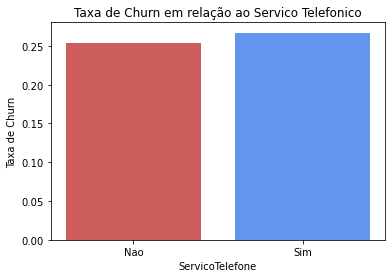

In [ ]:
x =df_plot['ServicoTelefone']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Telefonico');
plt.xlabel('ServicoTelefone');
plt.ylabel('Taxa de Churn');

Podemos observar que a  taxa de evasão de clientes que optam em ter serviço de telefone são iguais.

* ### Multiplas Linhas

In [ ]:
df_plot = dados_df1.groupby ('MultiplasLinhas'). Churn.mean (). reset_index () 
df_plot

,MultiplasLinhas,Churn
0,Nao,0.251583
1,SemTelefone,0.253401
2,Sim,0.284198


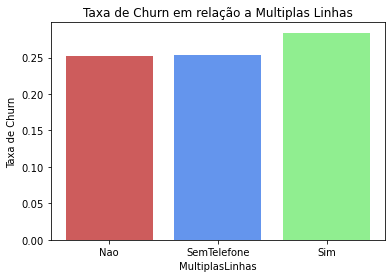

In [ ]:
x =df_plot['MultiplasLinhas']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Multiplas Linhas');
plt.xlabel('MultiplasLinhas');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa de evasão de clientes com multiplas linhas é em torno de 3% maior.

* ### Serviço de Internet

In [ ]:
df_plot = dados_df1.groupby ('ServicoInternet'). Churn.mean (). reset_index () 
df_plot

,ServicoInternet,Churn
0,DSL,0.192438
1,Fibra,0.415303
2,Nao,0.077103


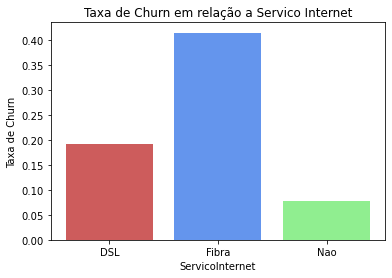

In [ ]:
x =df_plot['ServicoInternet']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Servico Internet');
plt.xlabel('ServicoInternet');
plt.ylabel('Taxa de Churn');

Clientes que utilizam fibra ótica tem taxa de cancelamento bem maior do que os outros serviços.
        
  Insights:
   
  - Verificar a qualidade de entrega do serviço ao cliente;         
                   

* ### Serviço Segurança Online

In [ ]:
df_plot = dados_df1.groupby ('ServicoSegurancaOnline'). Churn.mean (). reset_index () 
df_plot

,ServicoSegurancaOnline,Churn
0,Nao,0.416499
1,SemInternet,0.077103
2,Sim,0.144028


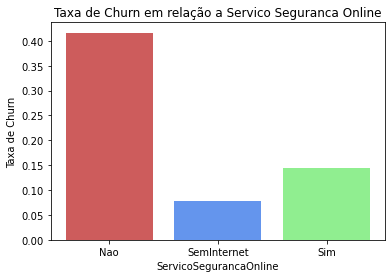

In [ ]:
x =df_plot['ServicoSegurancaOnline']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Servico Seguranca Online');
plt.xlabel('ServicoSegurancaOnline');
plt.ylabel('Taxa de Churn');

Verificamos que a taxa de evasão de clientes que não tem serviço segurança online é maior em relação aos que fazem uso do serviço.

 Insights:
   
  - Aumentar a confiabilidade/disponibilidade do serviço recebido pelo cliente;

* ### Serviço Backup Online

In [ ]:
df_plot = dados_df1.groupby ('ServicoBackupOnline'). Churn.mean (). reset_index () 
df_plot

,ServicoBackupOnline,Churn
0,Nao,0.398618
1,SemInternet,0.077103
2,Sim,0.215724


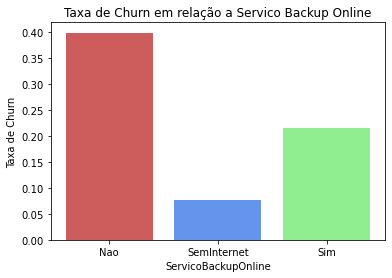

In [ ]:
x =df_plot['ServicoBackupOnline']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Servico Backup Online');
plt.xlabel('ServicoBackupOnline');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa de evasão de clientes que não utilizam serviço backup online é maior em relação aos que fazem uso do serviço.

 Insights:
   
  - Aumentar a confiabilidade/disponibilidade do serviço recebido pelo cliente;

* ### Proteção de Equipamento

In [ ]:
df_plot = dados_df1.groupby ('ProtecaoEquipamento'). Churn.mean (). reset_index () 
df_plot

,ProtecaoEquipamento,Churn
0,Nao,0.390678
1,SemInternet,0.077103
2,Sim,0.222818


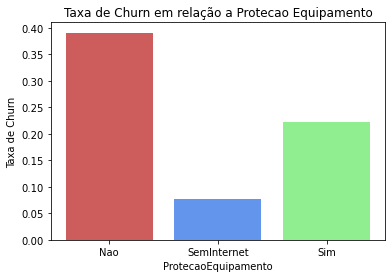

In [ ]:
x =df_plot['ProtecaoEquipamento']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Protecao Equipamento');
plt.xlabel('ProtecaoEquipamento');
plt.ylabel('Taxa de Churn');

Podemos observar que a a taxa de evasão de clientes que não utilizam-se da proteção equipamento é maior em relação aos que utilizam.

 Insights:
   
  - Aumentar a confiabilidade/disponibilidade do serviço recebido pelo cliente;

* ### Serviço Suporte Técnico

In [ ]:
df_plot = dados_df1.groupby ('ServicoSuporteTecnico'). Churn.mean (). reset_index () 
df_plot

,ServicoSuporteTecnico,Churn
0,Nao,0.412977
1,SemInternet,0.077103
2,Sim,0.153668


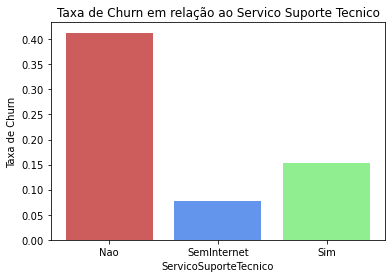

In [ ]:
x =df_plot['ServicoSuporteTecnico']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Suporte Tecnico');
plt.xlabel('ServicoSuporteTecnico');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa de evasão de clientes é maior em pessoas que nao fazem uso do serviço suporte técnico.

 Insights:
   
  - Aumentar a confiabilidade/disponibilidade do serviço recebido pelo cliente;

* ### Serviço Streaming

In [ ]:
df_plot = dados_df1.groupby ('ServicoStreamingTV'). Churn.mean (). reset_index () 
df_plot

,ServicoStreamingTV,Churn
0,Nao,0.334590
1,SemInternet,0.077103
2,Sim,0.299305


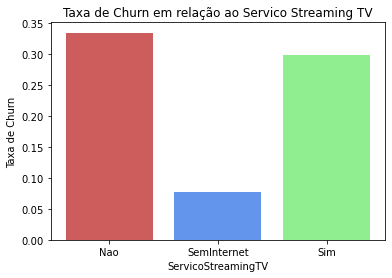

In [ ]:
x =df_plot['ServicoStreamingTV']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Streaming TV');
plt.xlabel('ServicoStreamingTV');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa de evasão de clientes que nao utilizam o serviço streaming TV é 4% maior em relação a que utilizam.

* ### Serviço Filme

In [ ]:
df_plot = dados_df1.groupby ('ServicoFilmes'). Churn.mean (). reset_index () 
df_plot

,ServicoFilmes,Churn
0,Nao,0.336592
1,SemInternet,0.077103
2,Sim,0.297818


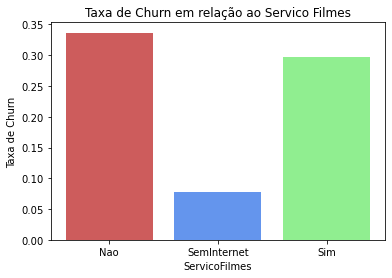

In [ ]:
x =df_plot['ServicoFilmes']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Filmes');
plt.xlabel('ServicoFilmes');
plt.ylabel('Taxa de Churn');

Podemos observar que a evasão de clientes é de 3% maior das que fazem uso do serviço de filmes.

* ### Tipo de Contrato

In [ ]:
df_plot = dados_df1.groupby ('TipoContrato'). Churn.mean (). reset_index () 
df_plot

,TipoContrato,Churn
0,2 anos,0.028671
1,Anual,0.116078
2,Mensal,0.427654


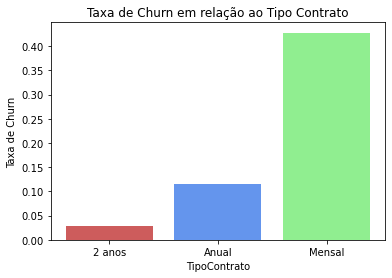

In [ ]:
x =df_plot['TipoContrato']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Tipo Contrato');
plt.xlabel('TipoContrato');
plt.ylabel('Taxa de Churn');

Podemos observar que a evasão de clientes que fazem uso pelo tipo de contrato mensal é maior em relação aos demais tipos.

 Insights:
   
  - Melhorar as condiçoes comerciais dos planos anuais para direcionar a pessoa para estes casos;

* ### Fatura Digital

In [ ]:
df_plot = dados_df1.groupby ('FaturaDigital'). Churn.mean (). reset_index () 
df_plot

,FaturaDigital,Churn
0,Nao,0.165647
1,Sim,0.335226


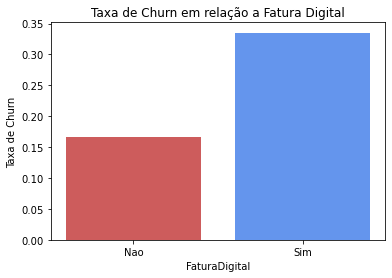

In [ ]:
x =df_plot['FaturaDigital']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Fatura Digital');
plt.xlabel('FaturaDigital');
plt.ylabel('Taxa de Churn');

Observamos que a a taxa de evasão de clientes que utilizam-se fatura digital é duas vezes maior daquelas que não fazem uso.

* ### Forma de Pagamento

In [ ]:
df_plot = dados_df1.groupby ('FormaPagamento'). Churn.mean (). reset_index () 
df_plot

,FormaPagamento,Churn
0,BoletoEletronico,0.449651
1,BoletoImpresso,0.193240
2,CartaoCredito,0.152074
3,DebitoAutomatico,0.171648


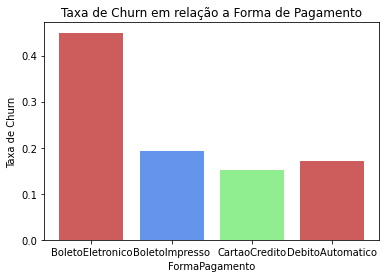

In [ ]:
x =df_plot['FormaPagamento']
y=df_plot['Churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Forma de Pagamento');
plt.xlabel('FormaPagamento');
plt.ylabel('Taxa de Churn');

Podemos observar que a taxa de evasão de clientes com boleto eletrônico é maior daqueles que utilizam de outras formas de pagamento.

Insights:
   
  - A forma de pagamento por boleto eletronico tem um resultado muito ruim. Se possível evitar;
  - Idéia: Oferecer benefícios caso a pessoa escolha a forma de pagamento automatica;

* ### Matriz de Correlação

Utilizaremos a função heatmap() para entender o relacionamento entre as variáveis numéricas.

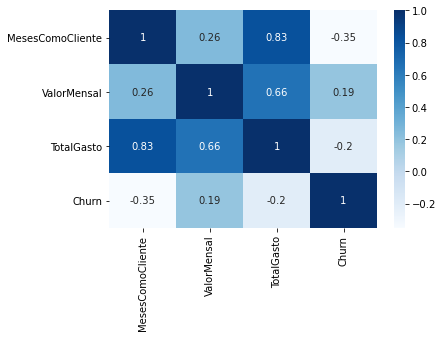

In [ ]:
sns.heatmap(dados_df1.corr(),annot = True,
            cmap='Blues');

* ### Meses como Cliente

Churn
0    37.671074
1    18.246377
Name: MesesComoCliente, dtype: float64

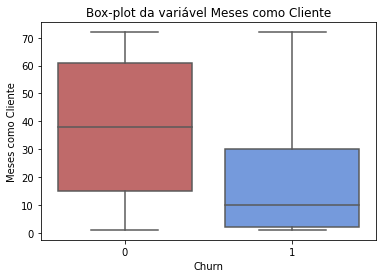

In [ ]:
#box-plot meses como cliente em relação ao Churn
sns.boxplot(x="Churn", y="MesesComoCliente", data=dados_df1,palette=cols);
plt.title('Box-plot da variável Meses como Cliente');
plt.xlabel('Churn');
plt.ylabel('Meses como Cliente');
dados_df1.groupby(['Churn'])['MesesComoCliente'].mean()

Podemos observar que a evasão de clientes é maior nos primeiros meses e vai diminuindo com o passar dos meses.

Insights: 
  - Baixa qualidade no atendimento do pós-venda;
  - Primeira experiência com o cliente não é boa;
  - Captação de cliente falha:
  - Clientes desqualificado;
  - Expectativas erradas ao adquirir o produto;

* ### Valor Mensal

Churn
0    61.480248
1    74.164871
Name: ValorMensal, dtype: float64

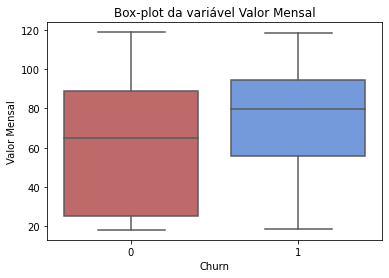

In [ ]:
#box-plot valor mensal em relação ao Churn
sns.boxplot(x="Churn", y="ValorMensal", data=dados_df1,palette=cols);
plt.title('Box-plot da variável Valor Mensal');
plt.xlabel('Churn');
plt.ylabel('Valor Mensal');
dados_df1.groupby(['Churn'])['ValorMensal'].mean()

Clientes que cancelaram possui um valor mensal maior do que aqueles clientes que não cancelaram o serviço.

* ### Total Gasto

Churn
0    2567.744222
1    1550.701985
Name: TotalGasto, dtype: float64

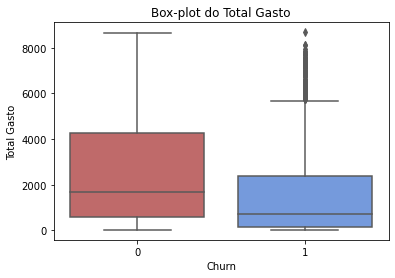

In [ ]:
#box-plot total gasto em relação ao Churn
sns.boxplot(x="Churn", y='TotalGasto', data=dados_df1,palette=cols);
plt.title('Box-plot do Total Gasto');
plt.xlabel('Churn');
plt.ylabel('Total Gasto');
dados_df1.groupby(['Churn'])['TotalGasto'].mean()

Clientes que cancelaram possui um total de gasto menor do que aqueles clientes que não cancelaram o serviço.

## 5 - Pré-Processamento

Em Machine Learning, é comum utilizarmos conjuntos de dados 100% numéricos para que fique adequado para qualquer modelo que se deseje utilizar. Isso significa que não pode haver dados faltantes e nem variáveis do tipo string (ou outros tipos que não sejam numéricos).

* ### Verificação de dados faltantes

In [ ]:
#Identificando os dados faltantes
dados_df1.isnull().sum()

Genero                    0
Aposentado                0
Casado                    0
Dependentes               0
MesesComoCliente          0
ServicoTelefone           0
MultiplasLinhas           0
ServicoInternet           0
ServicoSegurancaOnline    0
ServicoBackupOnline       0
ProtecaoEquipamento       0
ServicoSuporteTecnico     0
ServicoStreamingTV        0
ServicoFilmes             0
TipoContrato              0
FaturaDigital             0
FormaPagamento            0
ValorMensal               0
TotalGasto                0
Churn                     0
dtype: int64

Não há dados faltantes.

* ### Dummyficação de variáveis

In [ ]:
variaveis_cat = ['Genero', 'Aposentado', 'Casado', 'Dependentes', 'ServicoTelefone', 'MultiplasLinhas','ServicoInternet','ServicoSegurancaOnline','ServicoBackupOnline','ProtecaoEquipamento','ServicoSuporteTecnico','ServicoStreamingTV','ServicoFilmes','TipoContrato','FaturaDigital','FormaPagamento']

dados_df1 = pd.get_dummies(dados_df1, columns = variaveis_cat, drop_first = True)

In [ ]:
dados_df1.head()

,MesesComoCliente,ValorMensal,TotalGasto,Churn,Genero_Masculino,Aposentado_Sim,Casado_Sim,Dependentes_Sim,ServicoTelefone_Sim,MultiplasLinhas_SemTelefone,...,ServicoStreamingTV_SemInternet,ServicoStreamingTV_Sim,ServicoFilmes_SemInternet,ServicoFilmes_Sim,TipoContrato_Anual,TipoContrato_Mensal,FaturaDigital_Sim,FormaPagamento_BoletoImpresso,FormaPagamento_CartaoCredito,FormaPagamento_DebitoAutomatico
0,72,24.10,1734.65,0,1,0,1,1,1,0,...,1,0,1,0,0,0,0,0,1,0
1,44,88.15,3973.20,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
2,38,74.95,2869.85,1,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,55.90,238.50,0,1,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4,2,53.45,119.50,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


* ### Separando as variaveis numéricas das categoricas

Variáveis numéricas são aquelas variáveis que assumem valores numéricos, por exemplo a variável idade. As variáveis numéricas são classificadas como variaveis contínuas ou discreta.

As variáveis contínuas assumem valores na reta real, como a variável Salário Estimado. E as variáveis discretas são aquelas que assumem valores inteiros, como a variável número de produtos.

Variáveis categóricas são variáveis que não assumem valores numéricos. Por exemplo, a variável país.

As variáveis categóricas são classificadas como nominais e ordinais. As variáveis categóricas nominais são aquelas que não tem nenhuma ordem envolvida, por exemplo, a variável sexo e ordinais quando temos uma ordem envolvida, como a variável grau de escolaridade.

No pré processamento dos dados separamos as variáveis entre categóricas e numéricas, pois para cada tipo de variável utilizamos técnicas de processamento diferentes.

In [ ]:
#Variáveis Continuas
x_cont=['MesesComoCliente', 'ValorMensal','TotalGasto']
x_cont

['MesesComoCliente', 'ValorMensal', 'TotalGasto']

* ### Escalas das variáveis contínuas

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dados_df1[x_cont] = scaler.fit_transform(dados_df1[x_cont])
dados_df1[x_cont]

,MesesComoCliente,ValorMensal,TotalGasto
0,1.000000,0.058209,0.197998
1,0.605634,0.695522,0.456312
2,0.521127,0.564179,0.328993
3,0.042254,0.374627,0.025352
4,0.014085,0.350249,0.011620
...,...,...,...
5981,0.000000,0.763682,0.008793
5982,0.309859,0.724876,0.251500
5983,0.154930,0.028856,0.033147
5984,0.154930,0.807960,0.136320


* ### Separando as variáveis

No modelos de Machine Learning temos a variável dependente (variável resposta) que queremos prever, no nosso caso é a variável 'Churn'. E as covariáveis (variáveis independentes) que são as variáveis que irá explicar o Churn.

Para não modificar a variável resposta (target) durante o pré-processamento, iremos separá-la das outras variáveis do dataset.

In [ ]:
#Criando variaveis independentes e dependentes

y = dados_df1['Churn']
X = dados_df1
X = dados_df1.drop('Churn',axis = 1)
X

,MesesComoCliente,ValorMensal,TotalGasto,Genero_Masculino,Aposentado_Sim,Casado_Sim,Dependentes_Sim,ServicoTelefone_Sim,MultiplasLinhas_SemTelefone,MultiplasLinhas_Sim,...,ServicoStreamingTV_SemInternet,ServicoStreamingTV_Sim,ServicoFilmes_SemInternet,ServicoFilmes_Sim,TipoContrato_Anual,TipoContrato_Mensal,FaturaDigital_Sim,FormaPagamento_BoletoImpresso,FormaPagamento_CartaoCredito,FormaPagamento_DebitoAutomatico
0,1.000000,0.058209,0.197998,1,0,1,1,1,0,1,...,1,0,1,0,0,0,0,0,1,0
1,0.605634,0.695522,0.456312,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
2,0.521127,0.564179,0.328993,0,1,1,0,1,0,1,...,0,0,0,0,0,1,1,0,0,1
3,0.042254,0.374627,0.025352,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
4,0.014085,0.350249,0.011620,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0.000000,0.763682,0.008793,1,0,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,0
5982,0.309859,0.724876,0.251500,0,0,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
5983,0.154930,0.028856,0.033147,1,0,1,1,1,0,0,...,1,0,1,0,0,1,1,0,0,0
5984,0.154930,0.807960,0.136320,1,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,0


## 6 - ML_Modelo de Churn

Após o pré processamento, o conjunto de dados está pronto para a modelagem. Prever o Churn de clientes é um problema de classificação binária, 1 se Churn e 0 caso contrário.

Para prever os clientes em risco de Churn iremos utilizar o modelo KNN, Random Forest e XGBost. Lembre-se a variável resposta Churn tem apenas 26% de valores 1. E por isso escolhemos modelos que não sofrem tanta influência dos dados desbalanceado.

### Validação Hold-Out

Para analisar a capacidade de generalização do modelo é importante separar o dataset em conjunto de dados de treino e dados de teste. O conjunto de dados de treino utilizamos para treinar o modelo e utilizaremos 75% dos conjunto de dados para isso.

O conjunto de dados de teste utilizamos para analisar o quanto o modelo está acertando para prever as classes, 1 para Churn e 0 caso contrário. Essa etapa é necessária, para analisar como nosso modelo se comporta em dados desconhecidos.


In [ ]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino, y_teste  = train_test_split(X, y, test_size = 0.25,random_state = 1)
x_treino

,MesesComoCliente,ValorMensal,TotalGasto,Genero_Masculino,Aposentado_Sim,Casado_Sim,Dependentes_Sim,ServicoTelefone_Sim,MultiplasLinhas_SemTelefone,MultiplasLinhas_Sim,...,ServicoStreamingTV_SemInternet,ServicoStreamingTV_Sim,ServicoFilmes_SemInternet,ServicoFilmes_Sim,TipoContrato_Anual,TipoContrato_Mensal,FaturaDigital_Sim,FormaPagamento_BoletoImpresso,FormaPagamento_CartaoCredito,FormaPagamento_DebitoAutomatico
2914,0.563380,0.480100,0.312693,0,0,1,1,1,0,0,...,0,0,0,1,1,0,1,0,0,1
92,0.140845,0.594527,0.096123,1,0,0,1,1,0,1,...,0,0,0,0,0,1,1,1,0,0
3815,0.197183,0.608458,0.131237,1,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
3618,0.690141,0.807463,0.581693,1,0,1,0,1,0,1,...,0,1,0,1,1,0,0,0,0,0
3663,0.112676,0.253731,0.044646,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.140845,0.566667,0.087295,1,1,1,1,1,0,1,...,0,0,0,0,0,1,1,0,1,0
5200,0.816901,0.501990,0.467592,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
3987,0.394366,0.368159,0.184791,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
237,0.197183,0.504975,0.112624,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


### Modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0         938  153  1091
1         210  193   403
All      1148  346  1494


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, resultado_knn ))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1091
           1       0.56      0.48      0.52       403

    accuracy                           0.76      1494
   macro avg       0.69      0.67      0.68      1494
weighted avg       0.75      0.76      0.75      1494



### Encontrando o melhor K

Para encontrar o melhor K, ajustaremos varios modelos variando o número de K, aquele modelo que retornar o menor erro de predição é o modelo com K ideal.

In [ ]:
import numpy as np #manipulação algebricas

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_treino, y_treino)
    pred_i = knn.predict(x_teste)
    error.append(np.mean(pred_i != y_teste))

Na função acima, ajustei o modelo para diferentes k, variando k de 1 a 40. E depois calculei o número de erros de classificação e tirei a média, erro médio. A seguir, vou plotar os erros de predição para os diferentes k e aquele k com o menor erro, será o ajuste ideal.

Text(0, 0.5, 'Erro Médio')

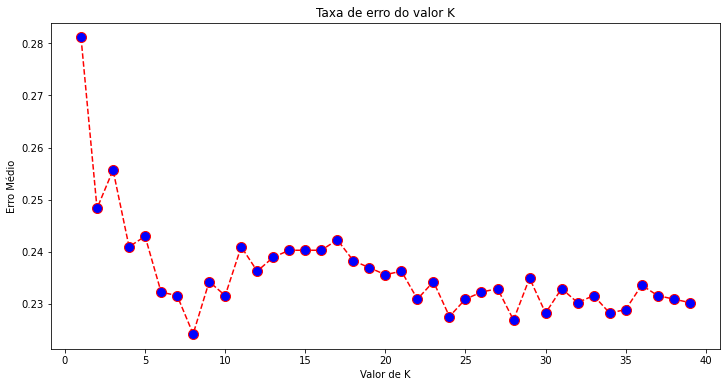

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

O melhor k=8, assim iremos ajustar novamente o modelo KNN considerando K=26.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=8)

### Previsão na amostra teste e matriz de confusão

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0         969  122  1091
1         213  190   403
All      1182  312  1494


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, resultado_knn ))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1091
           1       0.61      0.47      0.53       403

    accuracy                           0.78      1494
   macro avg       0.71      0.68      0.69      1494
weighted avg       0.76      0.78      0.77      1494



Observe que apesar de estar classificando bem os clientes que não deram Churn, classe 0, temos muitos falsos negativos no modelo (quando o modelo preve 0, mas o correto era 1). Ou seja, o modelo não consegue prever bem o Churn, que é o objetivo principal na análise.

Vamos tentar o modelo Random Forest para buscar um resultado melhor.

### Modelo Random Forest

In [ ]:
# Importe o modelo que estamos usando 
from sklearn.ensemble import RandomForestClassifier
# Instancie o modelo com 1000 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 1000, random_state = 42) 
# Treine o modelo nos dados de treinamento 
rf.fit (x_treino, y_treino);

In [ ]:
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0         989  102  1091
1         214  189   403
All      1203  291  1494


O modelo de Random Forest conseguiu melhores resultados, porém ainda temos bastante falsos negativos. Vamos tentar um modelo mais robusto e que não sofre tanta influência em amostras desbalanceada.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1091
           1       0.65      0.47      0.54       403

    accuracy                           0.79      1494
   macro avg       0.74      0.69      0.70      1494
weighted avg       0.78      0.79      0.78      1494



In [ ]:
#Analisando a importância de cada variável
rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
TotalGasto,0.192310
ValorMensal,0.165740
MesesComoCliente,0.163570
TipoContrato_Mensal,0.070695
ServicoInternet_Fibra,0.036153
Genero_Masculino,0.027473
ServicoSegurancaOnline_Sim,0.027077
FaturaDigital_Sim,0.025241
Casado_Sim,0.023856
ServicoSuporteTecnico_Sim,0.022830


## Modelo XGBoost

In [ ]:
#Importando as bibliotecas necessárias
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)
 

C:\Users\Adriano Galutti\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Validação do modelo nos dados de teste

In [ ]:
#fazendo as predições no dados de teste
preditos_xgb = xgb.predict(x_teste)
print (pd.crosstab(y_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0         951  140  1091
1         210  193   403
All      1161  333  1494


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1091
           1       0.58      0.48      0.52       403

    accuracy                           0.77      1494
   macro avg       0.70      0.68      0.68      1494
weighted avg       0.75      0.77      0.76      1494



Usando o XGBoost alcançamos uma acurácia de 77%. O modelo Random Forest teve uma acurácia de 79%, escolhemos o Random Forest  como o melhor modelo. Pois o Random Forest foi o modelo que conseguiu prever melhor o Churn.

Todas as medidas referentes a classe 1 foi melhor no Random Forest. Lembre-se, a acurácia é uma medida geral do acerto do modelo, e o modelo XGBoost não conseguiu prever a classe 0 tão bem quanto o modelo Random Forest, por isso a acurácia foi menor.

Porém como o nosso objetivo era prever o Churn, o modelo Random forest teve uma melhor performance nesse quesito.

### Analisando a importancia das variáveis

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

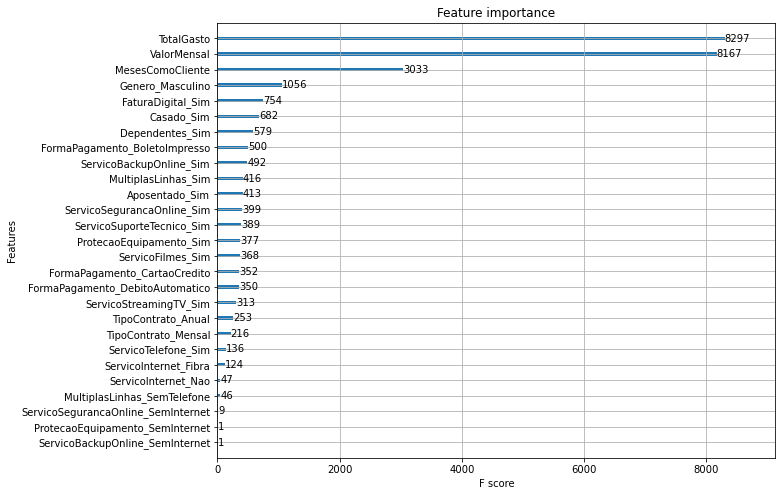

In [ ]:
#Analisando a importância de cada variável
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

As variáveis mais importante para prever o Churn dos clientes foram: total gasto, valor mensal, meses como cliente e genero masculino.

## Método Ensemble

Para tentar melhorar a previsão do Churn, vamos combinar os dois melhores modelos, Random Forest e XGBoost.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('rf', rf),('xgb',xgb)], voting='soft')
voto = voto.fit(x_treino,y_treino)

C:\Users\Adriano Galutti\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
y_predito = voto.predict(x_teste)
print (pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0         968  123  1091
1         216  187   403
All      1184  310  1494


In [ ]:
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1091
           1       0.60      0.46      0.52       403

    accuracy                           0.77      1494
   macro avg       0.71      0.68      0.69      1494
weighted avg       0.76      0.77      0.76      1494



Ao combinar os modelos observamos que não houve uma melhora nas medidas de validação, assim vamos considerar o modelo Random Forest como o nosso melhor modelo.

### Probabilidade de Churn

Finalmente, a melhor maneira de usar esse modelo é atribuir probabilidade de evasão para cada cliente, criar segmentos e criar estratégias sobre isso. Para obter a probabilidade de Churn do nosso modelo, utilize o bloco de código abaixo:

In [ ]:
dados_df1['proba'] = voto.predict_proba(X [x_treino.columns])[:,1]
dados_df1['IDCliente'] = dados_df.IDCliente
dados_df1[['IDCliente','proba']].sort_values(by = 'proba', ascending = False)

,IDCliente,proba
4378,0488-GSLFR,9.994387e-01
1086,7665-TOALD,9.994387e-01
2989,8375-DKEBR,9.988294e-01
5284,2636-ALXXZ,9.988294e-01
24,4871-JTKJF,9.986911e-01
...,...,...
2733,6285-FTQBF,3.579560e-06
3929,9430-NKQLY,1.883463e-06
3918,7064-JHXCE,1.826949e-06
5583,0784-ZQJZX,8.397271e-07
